# Network layer
- 它做什么：通过网络寻找路径
  - 从一个终端主机到另一个终端主机的路由
- 它不做什么:
  - 可靠的传输。"尽力而为的传递"
  - 保证路径
  - 交付的时间或顺序
  - 仲裁传输率
- 现在，把网络层看作是给我们提供了一个 "API"。有一个函数：sendtohost(data, host)
  - 承诺：数据将被送到那里（通常！！）
- 从发送主机到接收主机的传输段
  - 发送方：将网段封装成数据报，传递给链接层
  - 接收者：将网段传送到传输层协议
- 路由器
  - 检查通过它的所有IP数据报的头字段
  - 将数据报从输入端口移到输出端口，以沿端部路径传输数据报
- 网络层的功能:
  - forwarding: 将数据包从路由器的输入链路移至适当的路由器输出链路 
    - 转发表决定了该路由器的本地转发
  - routing: 确定数据包从源头到目的地的路线。
    - 路由算法决定了通过网络的终端路径

## IP: Internet Protocol

# IP datagram format
- 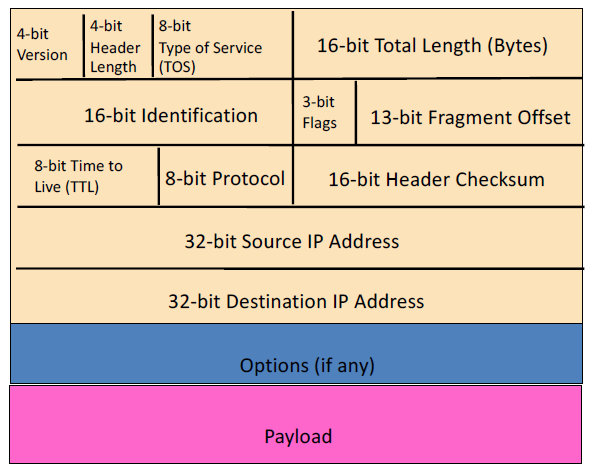
- `Version number` (4 bits)
  - 表示IP协议的版本
  - 有必要知道期待哪些其他字段
  - 通常是 "4"（对于IPv4）
  - 
- `Header length` (4 bits)
  - 报头中32位字的数量
  - 通常是 "5"（对于20字节的IPv4头）。
  - 当使用IP选项时可以更多
  - 
- `Total length` (16 bits)
  - 数据包中的字节数, 包括Header length
  - 最大尺寸为65,535字节（2^16-1）。
  - ...尽管链接层协议可能会施加更小的限制

- `Protocol` (8 bits)
  - Telling End-Host How to Handle Packet
  - 识别上级协议
  - 对接收主机的demultiplexing很重要

- `TLL`（8 bits）
  - Preventing Loops
  - 转发循环导致数据包循环很长时间, 随着这些数据的积累，最终会消耗掉所有的容量
  - TLL每一跳都会减少，如果达到0，数据包就会被丢弃,并向源头发送 "超时 "信息
  - 建议默认值为64

- `Header Checksum`（16 bits）
  - 只在数据包头上计算，方法与UDP/TCP校验和相同
  - 如果不正确，路由器会丢弃数据包
  - 因此，它不会对假信息采取行动
  - 在每个路由器上重新计算校验(include TTL)

- `Fragmentation Offset`（13 bits）
  - 网络链接有MTU（最大传输量）--最大可能的链接级帧
    - 不同的链接类型，不同的MTU
  - 大的IP数据报在网络中被分割（"碎片"）
    - 一个数据报变成几个数据报
    - 只有在最终目的地才 "重新组合"
    - IP头位用于识别和排列相关片段
  - 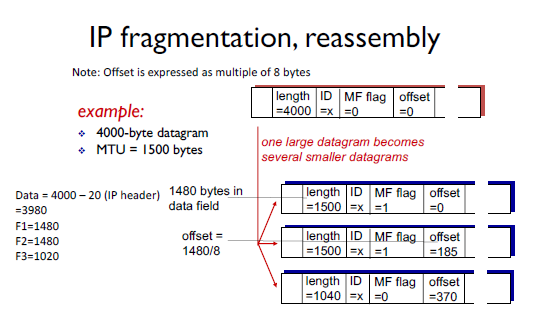

- `Type of Service` (8 bits)
  - Differentiated Services Code Point (DSCP)
  - 允许根据需要对数据包进行不同的处理
  - 例如，音频的低延迟，批量传输的高带宽
  - 已被重新定义过几次, 没有广泛使用

# fragmentation
- IPv4 fragmentation procedure
  - Fragmentation is harmful
  - Fragmentation
    - 路由器将数据报分割成输出链路所能支持的大小
    - 将IP头复制到碎片中
    - 调整碎片的长度
    - 设置偏移量以指示位置
    - 除最后一个片段外，在其他片段上设置MF（更多片段）标志
    - 重新计算校验和
  - 重新组装
    - 接收主机使用识别字段与MF和偏移量来完成数据报。

# IPv4 addressing
- IP地址。与每个主机或路由器接口相关的32位标识符
- 接口：主机/路由器和物理链接之间的连接
  - 路由器通常有多个接口
  - 主机通常有一个或两个接口（例如，有线以太网、无线802.11）。

- Network Mask
  - 与网络地址一起使用，表明网络部分使用了多少高阶位。
  - 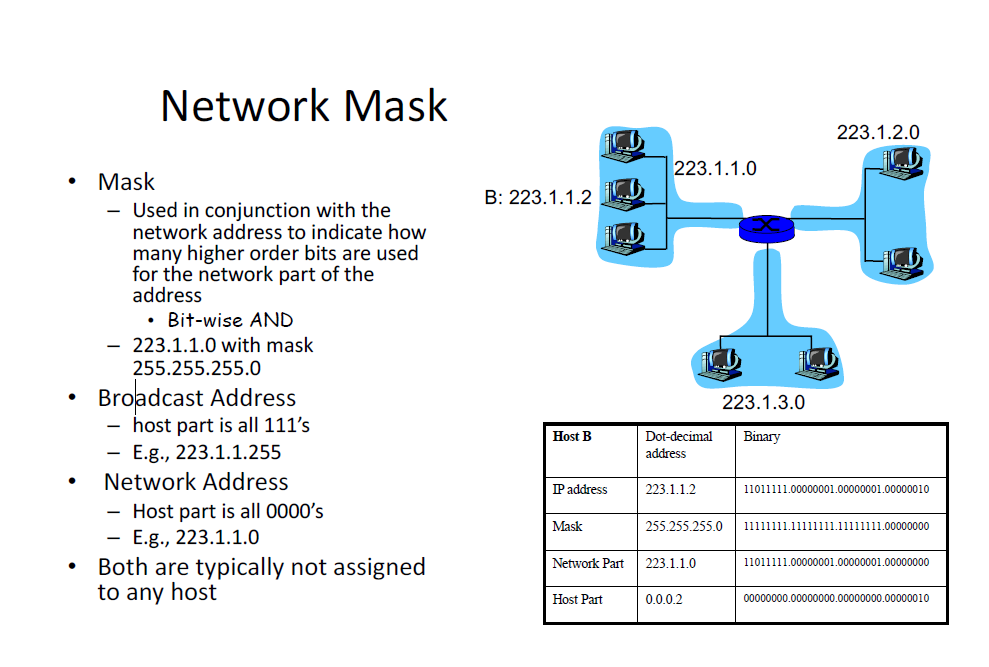

- Subnetting
  - 子网划分是将A类、B类或C类网络划分为更易于管理的小块，适合你的网络规模和结构的过程。
    - 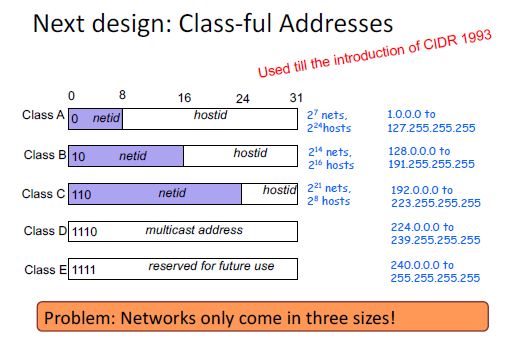
  - 子网划分允许3个层次的结构
  - netid、subnetid、hostid

- Classless InterDomain Routing (CIDR)
  - 地址的网络部分具有任意的长度
  - address format: `a.b.c.d/x`

- DHCP: Dynamic Host Configuration Protocol （DHCP）
  - 目标：主机在 "加入 "网络时，动态地从网络服务器获得IP地址
    - 可以在使用中的地址上续租
    - 允许重复使用地址（只在连接/开启时保留地址）
    - 支持加入/离开网络的移动用户
    - 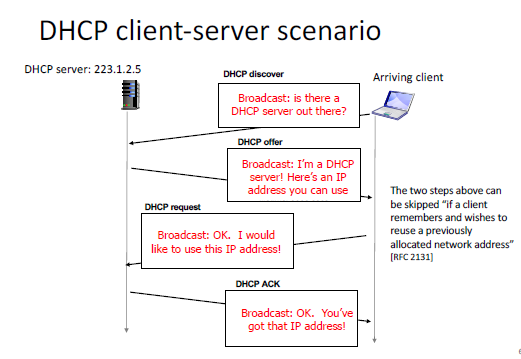
    - 连接笔记本电脑将使用DHCP来获得IP地址、第一跳路由器的地址、DNS服务器的地址。
      1. 用UDP封装的DHCP `REQUEST` 信息，用IP封装，用以太网封装
      2. 以太网帧在LAN(局域网)上广播（目的地：FFFFFFFFFFF），在运行DHCP服务器的路由器上收到
      3. 以太网解复用到IP解复用，UDP解复用到DHCP
      4. DCP服务器制定DHCP `ACK`，包含客户的IP地址、客户的第一跳路由器的IP地址、DNS服务器的名称和IP地址
      5. 封装的DHCP服务器回复被转发给客户，在客户处解复用为DHCP
      6. 客户端现在知道自己的IP地址、DNS服务器的名称和IP地址、第一跳路由器的IP地址。

- Route aggregation
  - 分层寻址允许有效地公布路由信息
  - 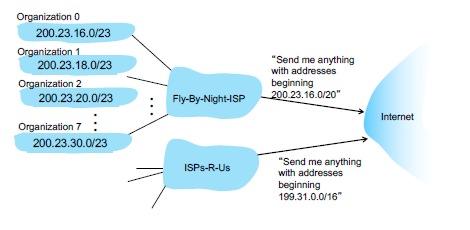
  - “Longest prefix matching”
    - 当为给定的目标地址寻找转发表项时，使用与目标地址匹配的最长的地址前缀。

# Network Address Translation (NAT)
- 就外部世界而言，本地网络中的所有设备只共享一个IPv4地址。

- 优势:
  - 所有设备只需从供应商ISP那里获得一个IP地址
  - 可以在不通知外界的情况下改变本地网络中的主机地址
  - 可以改变ISP而不改变本地网络中设备的地址
  - 安全性：本地网内的设备不能直接寻址，外界可以看到。

- 实施: NAT路由器必须透明地: 
  - 外发数据报：将每个外发数据报的（源IP地址，端口#）替换为（NATIP地址，新端口（随机生成））。
    - 远程客户/服务器将使用（NAT IP地址，新端口#）作为目标地址进行响应。
  - 记住（在NAT翻译表中）每个（源IP地址，端口#）到（NAT IP地址，新端口#）的翻译对
  - 传入的数据报：用存储在NAT表中的相应（源IP地址，端口#）替换每个传入数据报目标字段中的（NAT IP地址，新端口#）。
  - 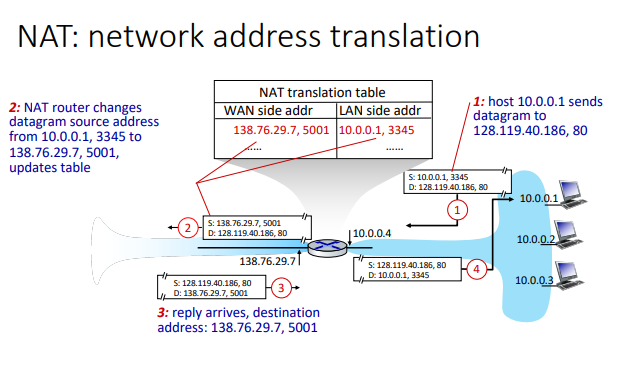
  - 会改变：
    - Source IP address
    - IP checksum
    - Transport checksum
    - Source port number

- NAT一直是有争议的。
  - 路由器 "应该 "只处理到第3层
    - 地址 "短缺 "应该由IPv6来解决
    - 违反了端到端的论点（网络层设备对端口#的操纵）。
    - NAT穿越：如果客户想要连接到NAT后面的服务器怎么办？
  - 尽管存在这些问题，NAT已经被广泛部署。
    - 广泛用于家庭和机构网络、4G/5G蜂窝网络中
    - 大多数协议可以成功通过NAT，包括VPN
    - 现代硬件可以在>100 Mbps的速度下轻松执行NAT功能

- NAT：实际问题
  - NAT修改了端口号和IP地址
    - 需要重新计算TCP和IP的checksum
  - 一些应用程序将IP地址或端口号嵌入其信息有效载荷中
    - 例如DNS、FTP（PORT命令）、SIP、H.323
    - 对于传统协议，NAT必须查看这些数据包并翻译嵌入的IP地址/端口号
    - 如果这些字段是加密的呢？(SSL/TLS, IPSEC, 等)
    - 如果应用程序周期性地改变端口号，NAT必须意识到这一点

# data plane
- 本地、每台路由器的功能
- 决定如何将到达路由器输入端口的数据报转发到路由器输出端口

# control plane
- 整个网络的逻辑
- 决定数据报如何在路由器之间沿着从源主机到目的主机的终端路径进行路由。
- 每一个路由器中的单个路由算法组件在控制平面中相互作用
- 两种控制平面方法。
  - traditional routing algorithms, 在路由器中实现
  - software-defined networking（SDN), 在（远程）服务器中实现
    - 远程控制器计算，在路由器中安装转发表

# Internet Routing
  - 互联网路由在两个层面上工作
    - 每个Autonomous System (AS)运行一个域内路由协议，在其域内建立路由
      - AS--单一行政实体下的网络区域
      - 链路状态，例如，开放最短路径优先 Open Shortest Path First（OSPF）
      - 距离矢量，例如，路由信息协议 Routing Information Protocol（RIP）
    - AS参与一个域间路由协议，该协议在域之间建立路由
      - 路径向量，例如，边界网关协议 Border Gateway Protocol（BGP）


## Routing Protocols

# Link State Routing
- Each node maintains its local “link state” (LS)
- "centralized"
- 每个节点 floods 其本地链路状态
  - 在收到新的LS消息时，路由器会将该消息转发给所有邻居。通过flooding 就等于是发给所有节点
- Flooding LSAs
  - 路由器在链路上传输 Link State Advertisement （LSA）
    - 邻居路由器在所有链路上转发出去，除了传入的以外
    - 在本地保留一份副本；不转发以前看到的LSA
  - 挑战
    - 数据包丢失
    - 不按顺序到达
  - 解决方案
    - 确认和重传
    - 序列号
    - 每个数据包的生存时间
- 最终，每个节点都学会了整个网络拓扑结构
  - 可以使用Dijkstra's来计算节点之间的最短路径

- Dijkstra’s link-state routing algorithm
  - 集中式 centralized：网络拓扑结构，所有节点都知道链接成本
    - 通过 "链路状态广播 "完成
    - 所有节点都有相同的信息
  - 计算从一个节点（"源"）到所有其他节点的最低成本路径
    - 提供该节点的转发表
  - 迭代 iterative：经过k次迭代，知道到k个目的地的最低成本路径

# Distance Vector Algorithm
- Bellman-Ford(BF) equation - dynamic programming
  - 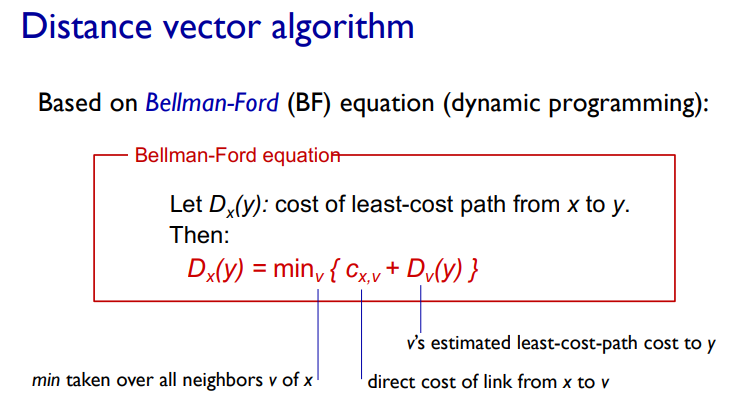
  - 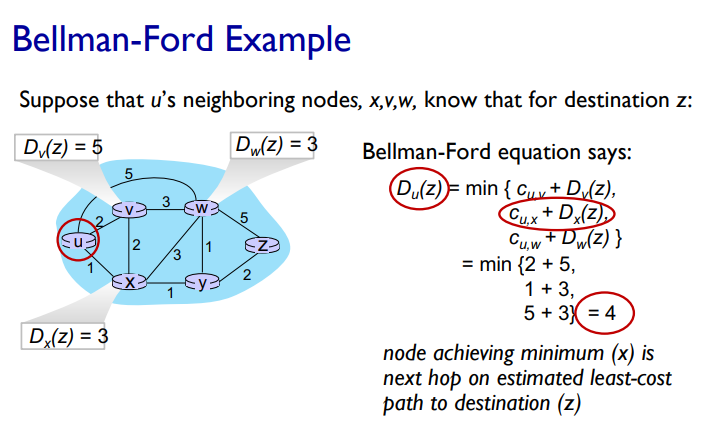
- 时不时地，每个节点都会将自己的距离向量估计值发送给邻居们
- 当x从任何邻居那里收到新的DV估计时，它使用B-F方程更新自己的DV。
- 如果到任何目的地的DV发生了变化，就通知邻居们
  - 一个链路成本的降低将总是触发该节点的DV算法的执行。然而，只有当DV因执行而发生变化时，才会发送DV更新，但情况可能并非总是如此。
- 在较小的自然条件下，估计值Dx(y)会收敛到实际的最小成本Dx(y)
- 距离向量的问题
  - 这些问题大多是由于收敛速度慢或路由器收敛的信息不正确造成的。
  - 收敛是指所有的路由器就通过网络的最佳路径达成一致的时间。
    - 每当拓扑结构发生变化时，随着路由器的收敛，网络会有一段不稳定的时期。
  - 对好消息反应迅速，但对坏消息反应迟钝
- Convergence delay depends on the topology (nodes and links) and link weights
- The “Poisoned Reverse” Rule
  - 避免计数到无限的启发式方法
  - 如果B通过C来到达A。
    - B告诉C它（B的）到A的距离是无限的(所以C不会通过B去找A)
  - 不能完全解决 Count-to-Infinity 问题

# Comparison of LS and DV algorithms
- DV
  - Distributed, decentralized
  - asynchronous
  - iterative
- LS
  - centralized
  - not iterative, but flooding

- 信息的复杂性
  - LS：n个路由器，发送O(n^2)个信息
  - DV：邻居之间的交换。收敛时间不同

- 收敛的速度
  - LS: O(n^2)算法，O(n^2)信息
    - 可能有震荡
  - DV：收敛时间不同
    - 可能有路由循环
    - Count-to-Infinity 问题

- 稳健性：如果路由器出现故障，或被破坏，会发生什么？
  - LS:
    - 路由器可以公布不正确的链接成本
    - 每个路由器只计算自己的表
  - DV:
    - DV 路由器可以公布不正确的路径成本（"我有一条到各处的低成本路径"）：黑洞。
    - 每个路由器的表被其他路由器使用：错误在网络中传播

# ICMP: Internet Control Message Protocol
- 由主机和路由器用于通信网络级信息
  - 错误报告：不可达的主机、网络、端口
  - 回声请求/回复（用于ping）
- 在IP层以上工作
  - IP数据报中携带的ICMP消息
- ICMP消息：类型、代码加上IP头和引起错误的IP数据报有效载荷的前8个字节
- 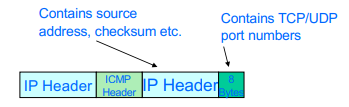
- 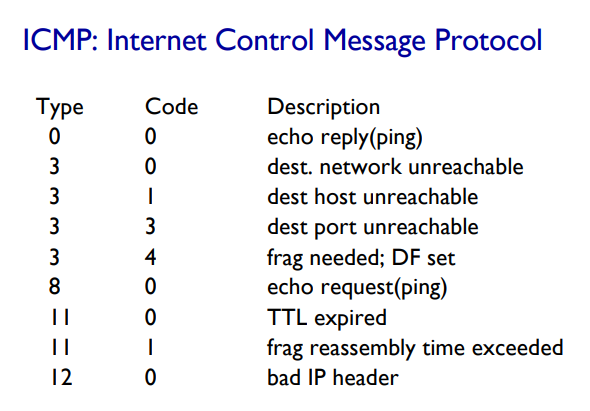

- Traceroute and ICMP
  - 源端向目的地发送一系列的UDP段
    - 第一组有TTL=1
    - 第二组有TTL=2，等等
    - 不可能的端口号
  
  - 当第n组数据报到达第n个路由器时。
    - 路由器丢弃数据报
    - 并发送源ICMP消息（类型11，代码0）
    - ICMP消息包括路由器的IP地址
  
  - 当ICMP消息到达时，来源方记录RTTs
  
  - 停止标准
    - UDP段最终到达目的地主机
    - 目的地返回ICMP "端口不可达 "消息（类型3，代码3）
    - 源端停止

In [1]:
import ipaddress

dest = {
    "Port 1": "128.8.16.0/20",
    "Port 2": "128.8.24.0/21",
    "Port 3": "128.8.128.0/24",
    "Port 4": "128.8.128.0/28",
}

def get_best_port(ip):
    ip = ipaddress.ip_address(ip)
    best_port = None
    best_net = None
    
    for port, net in dest.items():
        net = ipaddress.ip_network(net)
        if ip in net and (not best_net or net.prefixlen > best_net.prefixlen):
            best_port = port
            best_net = net
            
    return best_port
    
print(get_best_port("128.8.128.252"))
print(get_best_port("128.8.128.5"))
print(get_best_port("128.8.25.223"))
print(get_best_port("155.128.45.21"))

Port 3
Port 4
Port 2
None


In [10]:
ip = "12.1.0.0/17"

def getIPRange(ip):
    ip = ipaddress.ip_network(ip)
    return (ip[0], ip[-1])
    

print(getIPRange(ip))

(IPv4Address('12.1.0.0'), IPv4Address('12.1.127.255'))


In [11]:
def mask(number):
    return ipaddress.ip_address(2**32 - 2**(32-number))

print(mask(22))

255.255.252.0
